1. Business Understanding

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

pd.set_option('display.max_columns', None)
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

Q1. What is the average salary for each programming language?

In [2]:
df_salary = df[['Professional', 'HaveWorkedLanguage', 'Salary']]
df_salary = df_salary[df_salary.Professional == "Professional developer"]
df_salary = df_salary.drop('Professional', 1)
df_salary = df_salary.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
df_salary.head()

,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.0
14,Assembly; C; C++,100000.0
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
22,Java,100764.0
25,Java; Scala,175000.0


In [3]:
def split_column(column_split, delimeter, column_store, df):
    """
    Split column values by delimiter and expand so new DataFrame has 
    one split value of associated column per row.
    
    Param:
    column_to_split: str
        column whose values are to be split
    delimeter: str
        delimeter to split by
    columns_to_store: str
        column who's data must be stored along split rows
    df: pandas.DataFrame
        dataframe to use
    
    Return:
    Pandas DataFrame with same columns as df
    """
    split_col = pd.DataFrame(columns = [column_split, column_store])
    for index, row in df.iterrows():
        columns = row[column_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_store]]
    return split_col

In [4]:
languages_split = split_column('HaveWorkedLanguage','; ','Salary',df_salary)
languages_split.head()

,HaveWorkedLanguage,Salary
0,Java,113750.0
1,PHP,113750.0
2,Python,113750.0
3,Assembly,100000.0
4,C,100000.0


In [12]:
languages_split.sort_values('Salary',ascending=False).head()

,HaveWorkedLanguage,Salary
26068,Java,197000.0
26069,Python,197000.0
26070,R,197000.0
26071,Scala,197000.0
6425,JavaScript,195000.0


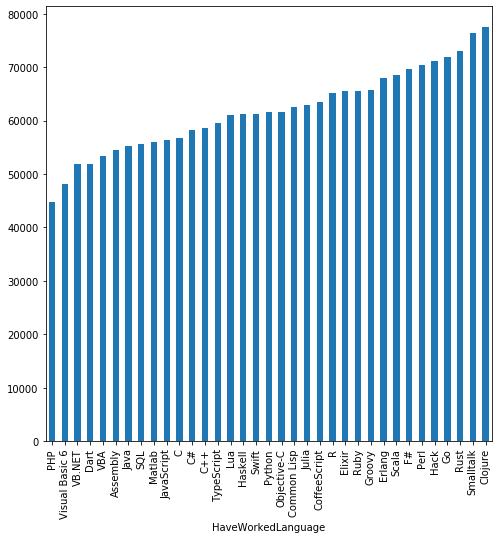

In [5]:
avg_salary = languages_split.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values()
plt.figure(figsize=(8,8))
avg_salary.plot(kind = 'bar')

Q2. What is the average job satisfaction for each programming language?

In [14]:
df_satisfy = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]
df_satisfy = df_satisfy[df_satisfy.Professional == "Professional developer"]
df_satisfy = df_satisfy.drop('Professional', 1)
df_satisfy = df_satisfy.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)
df_satisfy.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


In [16]:
languages_split2 = split_column('HaveWorkedLanguage','; ','JobSatisfaction',df_satisfy)
languages_split2.head()

,HaveWorkedLanguage,JobSatisfaction
0,Java,9.0
1,PHP,9.0
2,Python,9.0
3,CoffeeScript,7.0
4,Clojure,7.0


In [17]:
languages_split2.sort_values('JobSatisfaction',ascending=False).head()

,HaveWorkedLanguage,JobSatisfaction
38714,C,10.0
91138,TypeScript,10.0
11298,TypeScript,10.0
11314,CoffeeScript,10.0
11315,JavaScript,10.0


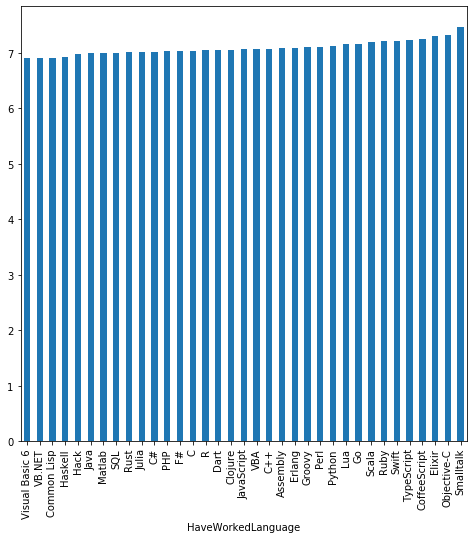

In [18]:
avg_satisfy = languages_split2.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()
plt.figure(figsize=(8,8))
avg_satisfy.plot(kind = 'bar')

Q3. Correlation between programming languages used at work and programming languages want to learn?

In [30]:
df_langworked = df[['Professional', 'HaveWorkedLanguage']]
df_langworked = df_langworked[df_langworked.Professional == "Professional developer"]
df_langworked = df_langworked.dropna(axis=0)
df_langworked.head()

,Professional,WantWorkLanguage
2,Professional developer,C; Python; Rust
7,Professional developer,Clojure; Elixir; Haskell; Scala
8,Professional developer,F#; Go
9,Professional developer,C#; Java; Objective-C; Swift
13,Professional developer,JavaScript; Ruby; Rust; Swift


In [33]:
df_langwant = df[['Professional', 'WantWorkLanguage']]
df_langwant = df_langwant[df_langwant.Professional == "Professional developer"]
df_langwant = df_langwant.dropna(axis=0)
df_langwant.head()

              Professional                 WantWorkLanguage
2   Professional developer                  C; Python; Rust
7   Professional developer  Clojure; Elixir; Haskell; Scala
8   Professional developer                           F#; Go
9   Professional developer     C#; Java; Objective-C; Swift
13  Professional developer    JavaScript; Ruby; Rust; Swift               Professional                                 HaveWorkedLanguage
2   Professional developer                                  Java; PHP; Python
7   Professional developer  CoffeeScript; Clojure; Elixir; Erlang; Haskell...
8   Professional developer                                     C#; JavaScript
9   Professional developer                                 Objective-C; Swift
13  Professional developer                        Java; JavaScript; Ruby; SQL


In [34]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    return column_series

In [35]:
lang_splitwork = split_column(df_langworked,'HaveWorkedLanguage')
lang_splitwork.head()

2                                 [Java,  PHP,  Python]
7     [CoffeeScript,  Clojure,  Elixir,  Erlang,  Ha...
8                                     [C#,  JavaScript]
9                                 [Objective-C,  Swift]
13                     [Java,  JavaScript,  Ruby,  SQL]
Name: HaveWorkedLanguage, dtype: object

In [36]:
lang_splitwant = split_column(df_langwant,'WantWorkLanguage')
lang_splitwant.head()

2                      [C,  Python,  Rust]
7     [Clojure,  Elixir,  Haskell,  Scala]
8                                [F#,  Go]
9        [C#,  Java,  Objective-C,  Swift]
13      [JavaScript,  Ruby,  Rust,  Swift]
Name: WantWorkLanguage, dtype: object

In [37]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

In [45]:
langworked = disarray(lang_splitwork)
langworked[:5]

['Java', 'PHP', 'Python', 'CoffeeScript', 'Clojure']

In [47]:
langwant = disarray(lang_splitwant)
langwant[:5]

['C', 'Python', 'Rust', 'Clojure', 'Elixir']

In [57]:
# Grouping data to create a new dataframe
rows = []
for items in list(zip(langworked, langwant)):
    for i in items[0]:
        rows.append({
            'langworked': i, 
            'langwant': Counter(items[0])
        })
        
programming_language_transition = pd.DataFrame(rows).groupby('langworked').agg({'langwant': 'sum'}).reset_index()
programming_language_transition.head()

,langworked,langwant
0,,<built-in method values of Counter object at 0...
1,#,<built-in method values of Counter object at 0...
2,+,<built-in method values of Counter object at 0...
3,-,<built-in method values of Counter object at 0...
4,.,<built-in method values of Counter object at 0...


In [56]:

for row in programming_language_transition['langworked']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['langwant']).items()])
    for key, value in dict(row['langwant']).items():
         programming_language_transition[key].loc[index] = (value / total)

TypeError: 'builtin_function_or_method' object is not iterable

In [ ]:
## Figure 3 — Percentage of relationship of work programming languages and desire programming 
## languages in 2017 and 2018.

matrix = programming_language_transition.drop('Wanted_PL', axis=1)\
                                        .set_index('Worked_PL')

plt.figure(figsize=(16, 10))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title('Programming Languages Heatmap', size = 16)
plt.ylabel('')
plt.show()